### Section 1 - Imports

This section imports all the necessary Python libraries that will be used throughout the code, like pandas for data analysis, tkinter for building GUI components, matplotlib for plotting, etc.

In [1]:
## Section 1. Libraries to be imported
import pandas as pd
from pandas import DataFrame
import io
import tkinter as tk
from tkinter import *
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

### Section 2 - Read Input Sheet 1

Uses pandas read_excel() to read the first sheet into a DataFrame. Loops through the "Roles", "Actors", and "Cash flow output names" columns, checking for NaN values. Appends each valid value to separate Python lists - roles, actors, cfl. This parses the lookup lists from Excel into lists we can use in Python.

In [2]:
def read_sheet1(file):

    Roles = {}
    Actors = {}
    Cash_fl_op = {}
    df = pd.read_excel(file, sheet_name=1)

  ##convert 'roles' column in excel file to list in python
    r = df['Roles'].tolist()
    roles = []
    for i in r:
        if pd.isnull(i) != True:
            roles.append(i)
    
    ##convert 'actors' column in excel file to list in python
    b = df['Actors'].tolist()
    actors = []
    for i in b: 
        if pd.isnull(i) != True:
            actors.append(i)
    
    ##convert 'cash flow output column names' in excel file to list in python
    c = df['Cash flow output names'].tolist()
    cfl = []
    for i in c:
        if pd.isnull(i) != True:
            cfl.append(i)
    
    #print(roles,'\n \n',actors,'\n \n',cfl)  

    ##Sheet 1 of excel sheet i.e. 'Lookups' was successfully imported and each column has been converted to python list.
    return roles, actors, cfl

### Section 3 - Read Input Sheet 2

Reads the second sheet into a DataFrame then extracts the "Scenario Index" and "Cash Flow" columns into lists, removing NaN values. Drops all NaN columns from the DataFrame then converts the column names into a Scenario_Index list. Loops through the Scenario_Index columns to build a dictionary of {cash_flow: amount} for each scenario. Also saves the scenario names.

This parses the core scenario data including the names, indexes, cash flows, and amounts per flow. These structures allow quick lookup of data later when analyzing scenarios.

In [3]:
def read_sheet2(file):

    df = pd.read_excel(file, sheet_name=2)

    ##Convert the Cash Flow column of sheet 2 into a python list
    s = df['Scenario Index'].tolist()
    Cash_Flow = []
    for i in s:
        if pd.isnull(i) != True and i != 'Cash Flow':
            Cash_Flow.append(i)
    
    #print(Cash_Flow)

    ##Convert the Scenario Index row of sheet 2 into a python list
    ##But first we drop all the empty rows and columns in out dataframe and create a new dataframe df1
    df1 = df.dropna(how = 'all', axis = 'columns')

    ##Now we convert the first row of df1 into a list
    l = list(df1.columns.values)
    Scenario_Index = []
    for i in l:
        if i != 'Scenario Index':
            Scenario_Index.append(i)
    #print(Scenario_Index)

    ##Now we create a dictionary for each scenario, with the cash flow values as key and the costs as value

    clist = []
    scenario_name = []

    for j in range(len(Scenario_Index)):
        name = {}
        ##We put the values of each cash flow from individual scenario into a new list
        scn = []
        scn = df[Scenario_Index[j]].tolist()
        scenario_name.append(scn[0])
        del scn[0]
        scn1 = []
        for i in scn:
            if pd.isnull(i) != True:
                scn1.append(i)
        #print(scn1)

        ##Now we create the dictionary with cashflow values as key and the cost as value for every individual scenario.
        for i, j in zip(Cash_Flow, scn1):
            name[i] = j
        clist.append(name)

    #print(clist)
    #print(scenario_name)

    return Cash_Flow, Scenario_Index,  scenario_name, clist

### Section 4 - Read Input Sheet 3

Reads sheet 3 into a DataFrame. Parses each relationship table into a dictionary:

1. cf_roles maps cash flows to their input/output roles
2. role_actor maps roles to actors
3. cf_cfon maps cash flows to their categorical output names

Creates lists of cash flows, input roles, and output roles in order as well that will be used later.

This extracts the key relationship metadata about how cash flows flow between roles and actors.

In [4]:
def read_sheet3(file):

    df = pd.read_excel(file, sheet_name = 3)

    ##Now we start with the first table.
    ##For the first table, showing the roles involved in a cash flow, we create a dictionary, 
    #where the cash flow name is the key and the value is a list with the name of the two roles involved.
    ##Syntax: dict = {'cf_name': ['role expenditure', 'role income']}
    cf_roles = {}

    cf = df['Cash Flow'].tolist()
    cf1 = []
    for i in cf:
        if pd.isnull(i) != True:
            cf1.append(i)

    re = df['Role Expenditure'].tolist()
    re1 = []
    for i in re:
        if pd.isnull(i) != True:
            re1.append(i)
            
    ri = df['Role Income'].tolist()
    ri1 = []
    for i in ri:
        if pd.isnull(i) != True:
            ri1.append(i)           
    for (i,j,k) in zip(cf1,re1,ri1):
        cf_roles[i] = [j, k]
    
    #print(cf_roles,'\n \n')

    ##Now we move to the next table and create a new dictionary for role and actor
    role_actor = {}

    ##We convert the role column into a list
    role = df['Role'].tolist()
    role1 = []
    for i in role:
        if pd.isnull(i) != True:
            role1.append(i)

    ##We convert the actor column into a list
    actor = df['Actor'].tolist()
    actor1 = []
    for i in actor:
        if pd.isnull(i) != True:
            actor1.append(i)

    ##We now create a dictionary with role as key and actor as value.
    for (i,j) in zip(role1, actor1):
        role_actor[i] = j
    #print(role_actor,'\n \n')

    ##Now we move to the third table and create a new dictionary for cash flow and cash flow output names
    cf_cfon = {}

    ##We convert the cash flow column into a list
    cafl = df['Cash Flow'].tolist()
    cafl1 = []
    for i in cafl:
        if pd.isnull(i) != True:
            cafl1.append(i)

    ##We convert the cash flow output names column into a list
    cfon = df['Cash Flow Output Names'].tolist()
    cfon1 = []
    for i in cfon:
        if pd.isnull(i) != True:
            cfon1.append(i)

    ##We now create a dictionary with role as key and actor as value.
    for (i,j) in zip(cafl1, cfon1):
        cf_cfon[i] = j
    #print(cf_cfon)
    
    return cf_roles, role_actor, cf_cfon, cf1, re1, ri1, cafl1

### Section 5 - Plot Scenario Mapping

Iterates through the scenarios to build a detailed mapping table showing the role and actor connections for each cash flow in each scenario. Inserts this into a tkinter Treeview table for display.

Provides a complete visual mapping of the scenario role and actor relationships for inspection.

<img align="left" src="./Figures/Scenario Mapping.png" style=" width:300px; padding: 10px; " >

In [5]:
def plot_scenario_mapping(Scenario_Index, scenario_name, cf_cfon, cf1, re1, ri1, role_actor):

    ScDt=[]

    ##Now we run the scenario index in a loop, and create new dictionaries that is equal to the number of scenario index
    ##Each dictionary is named after a cash flow. 
    for sc, sn in zip(Scenario_Index, scenario_name):
        Lst={}
        x=0
        for key1, nme in zip (cf_cfon, cf1):
            ##Now we create an auxiliary list that consists the values of the dict, which are the values in the table.
            aux=[]
            aux.append(sc)
            aux.append(sn)
            aux.append(key1)
            aux.append(cf_cfon[key1])
            aux.append(re1[x])
            aux.append(ri1[x])
            for key2 in role_actor:
                if key2 == re1[x]:
                    aux.append(role_actor[key2])
                    break
            for key3 in role_actor:
                if key3 == ri1[x]:
                    aux.append(role_actor[key3])
                    break
            Lst[nme]=aux
            x += 1
        ScDt.append(Lst)
    #print(ScDt)

##Now we use tkinter library to print the table in a new window.
#from tkinter import *
#from tkinter import ttk

    win = Tk()
    win.geometry()
    style = ttk.Style()
    style.theme_use()   
    tree = ttk.Treeview(win, column = ('Scenario Index', 'Scenario Name', 'Cash Flow', 'Cash Flow Output Names', 'Role Expenditure', 'Role Income', 'Actor Expenditure', 'Actor Income'), show = 'headings', height = 5)
    tree.column('# 1', anchor = CENTER)
    tree.heading('# 1', text = 'Scenario Index')
    tree.column('# 2', anchor = CENTER)
    tree.heading('# 2', text = 'Scenario Name')
    tree.column('# 3', anchor = CENTER)
    tree.heading('# 3', text = 'Cash Flow')
    tree.column('# 4', anchor = CENTER)
    tree.heading('# 4', text = 'Cash Flow Output Names')
    tree.column('# 5', anchor = CENTER)
    tree.heading('# 5', text = 'Role Expenditure')
    tree.column('# 6', anchor = CENTER)
    tree.heading('# 6', text = 'Role Income')
    tree.column('# 7', anchor = CENTER)
    tree.heading('# 7', text = 'Actor Expenditure')
    tree.column('# 8', anchor = CENTER)
    tree.heading('# 8', text = 'Actor Income')

    for items in ScDt:
        for key in items:
            tree.insert('', 'end', text = '1', values = (items[key]))
        
    tree.pack()
    win.mainloop()

### Section 6 - Plot Scenario Mapping with Amounts

Inserts the cash flow amounts from the extracted scenario data. Augments Section 5 with the numerical values for each flow.

<img align="left" src="./Figures/scn_mapping_wd_amts.png" style=" width:300px; padding: 10px; " >

In [6]:
def plot_scenario_mapping_with_amounts(Scenario_Index, scenario_name, cf_cfon, cf1, re1, ri1, role_actor, clist):

    ScDt1=[]

    for sc, cdict, sn in zip(Scenario_Index, clist, scenario_name):
        Lst1={}
        x=0
        for key1, nme, key in zip (cf_cfon, cf1, cdict):
            aux=[]
            aux.append(sc)
            aux.append(sn)
            aux.append(key1)
            aux.append(cf_cfon[key1])
            for key2 in role_actor:
                if key2 == re1[x]:
                    aux.append(role_actor[key2])
                    break
            for key3 in role_actor:
                if key3 == ri1[x]:
                    aux.append(role_actor[key3])
                    break
            if key == nme:
                aux.append(round(cdict[key]))
            Lst1[nme]=aux
            x += 1
        ScDt1.append(Lst1)
    #print(ScDt1)

    win = Tk()
    win.geometry()
    style = ttk.Style()
    style.theme_use()
    tree = ttk.Treeview(win, column = ('Scenario Index', 'Scenario Name', 'Cash Flow', 'Cash Flow Output Names', 'Actor Expenditure', 'Actor Income', 'Amount (£)'), show = 'headings', height = 5)
    tree.column('# 1', anchor = CENTER)
    tree.heading('# 1', text = 'Scenario Index')
    tree.column('# 2', anchor = CENTER)
    tree.heading('# 2', text = 'Scenario Name')
    tree.column('# 3', anchor = CENTER)
    tree.heading('# 3', text = 'Cash Flow')
    tree.column('# 4', anchor = CENTER)
    tree.heading('# 4', text = 'Cash Flow Output Names')
    tree.column('# 5', anchor = CENTER)
    tree.heading('# 5', text = 'Actor Expenditure')
    tree.column('# 6', anchor = CENTER)
    tree.heading('# 6', text = 'Actor Income')
    tree.column('# 7', anchor = CENTER)
    tree.heading('# 7', text = 'Amount (£)')
    
    for items in ScDt1:
        for key in items:
            tree.insert('', 'end', text = '1', values = (items[key]))
        
    tree.pack()
    win.mainloop()
    
    return ScDt1

### Section 7 - Create Matrices

Uses the relationship metadata to build square numpy matrices with scenarios on rows and actors on columns. Populates the matrix values with cash flow amounts between actors.

This converts the relationship data into matrices that can be easily mathematically analyzed.

In [7]:
def create_matrices(Scenario_Index, cf_cfon, cf1, re1, ri1, role_actor, clist, actors, cafl1):

    ScDt3=[]

    for sc, cdict in zip(Scenario_Index, clist):
        Lst1={}
        x=0
        for key1, nme, key in zip (cf_cfon, cf1, cdict):
            aux=[]
            aux.append(sc)
            aux.append(key1)
            aux.append(cf_cfon[key1])
            for key2 in role_actor:
                if key2 == re1[x]:
                    aux.append(role_actor[key2])
                    break
            for key3 in role_actor:
                if key3 == ri1[x]:
                    aux.append(role_actor[key3])
                    break
            if key == nme:
                aux.append(round(cdict[key]))
            Lst1[nme]=aux
            x += 1
        ScDt3.append(Lst1)

    ExDt = []

    for (sc, dct) in zip(Scenario_Index, ScDt3):
        dct1 = {}
        l = list(dct.values())
        aux = []
        for i in l:
            del i[1]
            aux.append(i)
            dct1[sc] = aux
        ExDt.append(dct1)

    no_act = len(actors)
    no_cf = len(cafl1)
    len_act = []
    for i in range(no_act): 
        len_act.append(i)

    cases = []
    act_dict = {}
    for i, j in zip(actors, len_act):
        act_dict[i] = j

    for dct in ExDt:
        M = np.zeros((no_cf, no_act))
        for i, l in zip(Scenario_Index, dct):
            scenario = i
            M = np.zeros((no_cf, no_cf))
            for l1 in dct[l]:
                if M[act_dict[l1[2]], act_dict[l1[3]]] == 0:
                    M[act_dict[l1[2]], act_dict[l1[3]]] = round(int(l1[4]))
                elif M[act_dict[l1[2]], act_dict[l1[3]]] != 0:
                    M[act_dict[l1[2]], act_dict[l1[3]]] = round(int(M[act_dict[l1[2]], act_dict[l1[3]]] + l1[4]))
            cases.append(M)

    return cases, ExDt, ScDt3

### Section 8 - Create Final Tables

Sums the per-scenario matrices into aggregated cash flow totals by actor. Displays these final totals in another tkinter table.

<img align="left" src="./Figures/total_cfl_scenario.png" style=" width:300px; padding: 10px; " >

Converts the matrix data into human readable final tables of total flows by actor in each scenario.

In [8]:
def create_final_tables(actors, cfl, ExDt, Scenario_Index, scenario_name, cfon_dict, act_dict):

    no_act = len(actors)
    len_act = []
    for i in range(no_act): 
        len_act.append(i)

    act_dict = {}
    for i, j in zip(actors, len_act):
        act_dict[i] = j

    no_cf = len(cfl)
    len_cfon = []
    for i in range(no_cf): 
        len_cfon.append(i)
    cfon_dict = {}
    for i, j in zip(cfl, len_cfon):
        cfon_dict[i] = j

    cases1 = []

    for dct in ExDt:
        M = np.zeros((no_cf, no_act))
        for i, l in zip(Scenario_Index, dct):
            scenario = i
            M = np.zeros((no_cf, no_act))
            for cf in cfon_dict:
                for l1 in dct[l]:
                #print(cf)
                    if cf == l1[1]:
                        M[cfon_dict[l1[1]], act_dict[l1[2]]] -= l1[4]
                        M[cfon_dict[l1[1]], act_dict[l1[3]]] += l1[4]             
            cases1.append(M)

    tcf = []

    for i, sc, sn in zip(range(len(Scenario_Index)), Scenario_Index, scenario_name):
        dct = {}
        lst1 = []
        x = 0  
        for j, c in zip(cfon_dict, cfl):
            lst = []
            lst.append(sc)
            lst.append(sn)
            lst.append(j)
            for k in act_dict:
                a = 0
                b = 0
                a = cases1[i][cfon_dict[j], act_dict[k]]
                lst.append(a)       
            lst1.append(lst)
            dct[i+1] = lst1
        tcf.append(dct)
        
    #print(tcf)

    win = Tk()
    win.geometry()
    style = ttk.Style()
    style.theme_use()
    act_list = ['Scenario Index', 'Scenario Name', 'Cash Flow Output Names']
    for i in actors:
        act_list.append(str(i))
    
    act_tp = tuple(act_list)
    tree = ttk.Treeview(win, column = act_tp, show = 'headings', height = 5)

    x = 1
    for i in act_tp:
        a = '#'+ ' ' + str(x)
        tree.column(a, anchor = CENTER)
        tree.heading(a, text = i)
        x = x+1
    for items in tcf:
        for key in items:
            for l in items[key]:
                tree.insert('', 'end', text = '1', values = (l))
        
    tree.pack()
    win.mainloop()

### Section 9 - Plot Scenario Cashflows

Allows user to pick a scenario, then plots the total cashflows in/out for each actor in that scenario as a stacked bar chart.

<img align="left" src="./Figures/Cash_in_out.png" style=" width:300px; padding: 10px; " >

Generates a graphical view of the cashflow distribution for inspection.

<img align="left" src="./Figures/Cashflow_Distribution.png" style=" width:300px; padding: 10px; " >


In [9]:
def plot_scenario_cashflows(Scenario_Index, scenario_name, ScDt3, actors):

    lst = []

    for sc, items in zip(Scenario_Index, ScDt3):
        aux = []
        dt = {}
        for act in actors:
            total = 0
            sc_lst = 0
            dt1 = {}
            for key in items:
                sc_lst = items[key]
                #print(sc_lst[2], ' ,', sc_lst[3],' ,',act, ', ',sc_lst[4])
                if sc_lst[2] == act:
                    total = total - sc_lst[4]
                elif sc_lst[3] == act:
                    total = total + sc_lst[4]
               #print(total)
            dt1[act] = total
            #print(dt1)
            aux.append(dt1)
        dt[sc] = aux
        #print(dt)
        lst.append(dt)
    #print(lst)

    scenario = int(input('Enter the scenario index:- '))
    #print(scenario)
    value = []
    for dct in lst:
        for key in dct:      
            if key == scenario:
                for i in dct[key]:
                    for key1 in i:
                        value.append(i[key1])
    
    #print(lst)

    #setting bar colors
    color_list = []
    name = 'Scenario ' + str(scenario) + ' Cash Flow'
    plt.figure(figsize = (18, 12))
    plt.rcParams.update({'font.size':15})
    plt.bar(actors, value, color = ['#2CBDFE', '#661D98', '#47DBCD', '#F5B14C', '#FF3E96', '#EE82EE', '#00868B', '#8E8E8E', '#00FF00', '#00BFFF', '#7FFF00'], width = 0.4)
    plt.title(name)
    plt.xlabel('Actors')
    plt.ylabel('Revenue')
    plt.xticks(rotation=90)
    plt.grid(color = 'black', linestyle = '--', linewidth = 1)
    plt.gca().spines['left'].set_color('red')
    plt.gca().spines['bottom'].set_color('green')
    plt.gca().spines['right'].set_color('red')
    plt.gca().spines['top'].set_color('green')
    plt.show()
    plt.savefig(fname = 'Scenario Cashflow')

    lm0 = 0
    lm0 = []
    ac = 0
    ac = actors

    for i in ac:
        l= []
        l.append(i)
        lm0.append(l)

    for m in lm0:
        for i in lst:
            for j in i:
                v = i[j]
                #print(v)
                for k in v:
                    for n in k:
                        if n == m[0]:
                            m.append(k[n])

    #create data
    sn1 = [] 
    for i in scenario_name:
        sn1.append(i)
    sn1.insert(0, 'Scenario')
    df1 = 0
    df1 = pd.DataFrame(lm0, columns = sn1)
    
    #print(lm0)

    name = ' Cash Flow'
    ax = df1.plot(x = 'Scenario', kind = 'bar', stacked = True, title = name, figsize = (35, 30) , fontsize = 40)
    ax.legend(fontsize = 35, bbox_to_anchor=(1.0, 1.0))
    ax.grid(color = 'black', linestyle = '--', linewidth = 1)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.set_xlabel('Actors', fontsize=40)
    ax.set_ylabel('Revenue (£)', fontsize=40)

### Section 10 - Compare Actor Cashflow

Enables picking an actor and scenario to use as a baseline. Compares that baseline actor's cash flows in the selected scenario vs. all other scenarios.

<img align="left" src="./Figures/Act_Cfl_Scenarios.png" style=" width:300px; padding: 10px; " >

Provides ability to instantly compare one actor's cash flows across different scenarios.

In [10]:
def compare_actor_cashflow(cf_roles, role_actor, ScDt3, Scenario_Index, scenario_name, cf_cfon, re1, ri1, clist, cf1):

    act_name = input('Actor name to be compaed for cash flow?')
    base_sc = int(input('Scenario you want as base:'))

    role_list = []

    for i in role_actor:
        if role_actor[i] == act_name:
            role_list.append(i)  

    list_act = []

    for i in cf_roles:
        #print(cf_roles[i])
        for j in cf_roles[i]:
            for k in role_list:
            #print(i, j)
                if j == k:
                    list_act.append(i)

    baux = []
    aux = []
    nl = []

    for i in ScDt3:
        for j in i:
            l = i[j]
            #print(j)
            for k in list_act:
                if j == k and l[0] == base_sc and l[2] == act_name:
                    baux.append(l[4])
                elif j == k and l[0] == base_sc and l[3] == act_name:
                    baux.append(-l[4])
    #print(baux)
                
    aux1 = []
                
    for i in ScDt3:
        num = 0
        for j in i:
            l = i[j]
            if l[0] != base_sc:
                num  = l[0]
            for k in list_act:
                if j == k and num == l[0]:
                    aux1.append(num)
    aux2 = []
    for i in aux1:
        if i not in aux2:
            aux2.append(i)
        
    #print(aux2)

    ScDt2=[]

    for sc, cdict in zip(Scenario_Index, clist):
        Lst1={}
        x=0
        if sc != base_sc:
            for key1, nme, key in zip (cf_cfon, cf1, cdict):
                aux=[]
                aux.append(sc)
                aux.append(key1)
                aux.append(cf_cfon[key1])
                for key2 in role_actor:
                    if key2 == re1[x]:
                        aux.append(role_actor[key2])
                        break
                for key3 in role_actor:
                    if key3 == ri1[x]:
                        aux.append(role_actor[key3])
                        break
                if key == nme:
                    aux.append(round(cdict[key]))
                Lst1[nme]=aux
                x += 1
            ScDt2.append(Lst1)

    while {} in ScDt2:
        ScDt2.remove({})

    #print(ScDt2)

    o_lst = []

    for i, m in zip(ScDt2, aux2): 
        #print(i)
        dct3 = {}
        aux3 = []
        for j in i:  
            for k in list_act:  
                #print(k,' ',m,' ',j)
                l = i[j]
                #print(l)
                aux4 = []
                if j == k and act_name == l[3]:
                    #print(l[5])
                    #print(m)
                    aux4.append(l[0])
                    aux4.append(l[1])
                    aux4.append(l[5])
                    aux3.append(aux4)
                    #print(aux3)
                elif j == k and act_name == l[4]:
                    aux4.append(l[0])
                    aux4.append(l[1])
                    aux4.append(-l[5])
                    aux3.append(aux4)  
            dct3[m] = aux3
        o_lst.append(dct3)                    

    #print(o_lst)

    f_lst = []

    for i, m in zip(o_lst, aux2):
        dct4 = {}
        aux3 = []
        for j in i:
            a = 0
            for k, l in zip(i[j], baux):
                aux4 = []
                #print(k)
                a = k[2] - l
                aux4.append(k[0])
                aux4.append(k[1])
                aux4.append(a)
                aux3.append(aux4)
            dct4[m] = aux3
        f_lst.append(dct4)

    b_lst = []

    for i in list_act:
        dct6 = {}
        aux6 = []
        for j in f_lst:
            for k in j:
                for l in j[k]:
                #print(l)
                    if l[1] == i:
                        #aux6.append(l[1])
                        aux6.append(l[2])
            #aux6 = list(dict.fromkeys(aux6))
            dct6[i] = aux6
        b_lst.append(dct6)

    for i in b_lst:
        for j in i:
            i[j].insert(0, j)


    nl = ['Scenario Name']
    for i in scenario_name:
        nl.append(str(i))    
    nld = {'row2': nl}   
    b_lst.insert(0, nld)


    sc = ['Cash Flow']
    for i in Scenario_Index:
        sc.append(str(i))
    
    sct = tuple(sc)
    win = Tk()
    win.geometry()

    style = ttk.Style()
    style.theme_use()
    
    tree = ttk.Treeview(win, column = sct, show = 'headings', height = 5)
    tree.column("#0", minwidth = 1150)

    x = 1
    for i in sct:
        a = '#'+ ' ' + str(x)
        tree.column(a, anchor = CENTER)
        tree.heading(a, text = i)
        x = x+1
    
    for items in b_lst:
        for key in items:
            if key == 'row2':
                tree.insert('', 'end', text = '1', values = (items[key]))
            else:
                items[key].insert(base_sc, 0)
                tree.insert('', 'end', text = '1', values = (items[key]))
       
    tree.pack()
    win.mainloop()
    
    return list_act, f_lst, base_sc, act_name

### Section 11 - Plot Actor Cashflow

Plots the actor cashflow comparison data as a stacked bar chart over scenarios.

<img align="left" src="./Figures/Actor_Cashflow.png" style=" width:300px; padding: 10px; " >

Visualizes the changes in a focus actor's cash flows across all scenarios for inspection.

In [11]:
def plot_actor_cashflow(list_act, f_lst, scenario_name, base_sc, act_name):

    auxl = []

    for i in range(len(list_act)):
        auxl.append(0)

    #create a dict_list acc to scenario.

    lm = []

    for i in f_lst:
        for j in i:
            l = []
            for k in i[j]:
                l.append(k[2])
            lm.append(l)
    lm.insert(base_sc - 1, auxl)

    for i, j in zip(lm, scenario_name):
        i.insert(0, j)

    
    #create data
    list_act.insert(0, 'Scenario')
    df = pd.DataFrame(lm, columns = list_act)

    name = act_name + ' Cash Flow'

    ax = df.plot(x = 'Scenario', kind = 'bar', stacked = True, title = name, figsize = (9,7), fontsize = 15)
    plt.legend(fontsize = 12, bbox_to_anchor=(1.0, 1.0))
    plt.grid(color = 'black', linestyle = '--', linewidth = 1)

    ax.set_ylabel('Revenue (£)')

    #plt.savefig(r'C:\Users\rijum\OneDrive\Desktop\Value Mapping\Cash_Flow_By_Actor.jpeg')

### Section 12 - Full analysis

Runs all the analysis functions to generate the full set of tables, matrices, charts and comparisons.

Provides the complete VSM analysis in one place with all outputs.

In [12]:
def run_full_analysis(file_path):

    # Read input sheets
    roles, actors, cfl = read_sheet1(file_path)
    Cash_Flow, Scenario_Index, scenario_name, clist = read_sheet2(file_path)
    cf_roles, role_actor, cf_cfon, cf1, re1, ri1, cafl1 = read_sheet3(file_path)

    # Create scenario mapping table
    ScDt = plot_scenario_mapping(Scenario_Index, scenario_name, cf_cfon, cf1, re1, ri1, role_actor)

    # Create scenario mapping table with amounts
    ScDt1 = plot_scenario_mapping_with_amounts(Scenario_Index, scenario_name, cf_cfon, cf1, re1, ri1, role_actor, clist)

    # Create matrices
    cases, ExDt, ScDt3 = create_matrices(Scenario_Index, cf_cfon, cf1, re1, ri1, role_actor, clist, actors, cafl1)
    

    # Create final tables
    len_cfon = [i for i in range(len(cfl))]
    cfon_dict = {i:j for i,j in zip(cfl, len_cfon)}

    len_act = [i for i in range(len(actors))]
    act_dict = {i:j for i,j in zip(actors, len_act)}

    tcf = create_final_tables(actors, cfl, ExDt, Scenario_Index, scenario_name, cfon_dict, act_dict)

    # Plot scenario cashflows
    plot_scenario_cashflows(Scenario_Index, scenario_name, ScDt3, actors)

    # Compare actor cashflow
    list_act, f_lst, base_sc, act_name = compare_actor_cashflow(cf_roles, role_actor, ScDt3, Scenario_Index, scenario_name, cf_cfon, re1, ri1, clist, cf1)

    # Plot actor cashflow
    plot_actor_cashflow(list_act, f_lst, scenario_name, base_sc, act_name)


### Using the tool

Enter the file path when prompted.

Enter the file path: /Users/soumyajitmitra77/Downloads/VSM_Input (1) (1).xlsx
Enter the scenario index:- 1


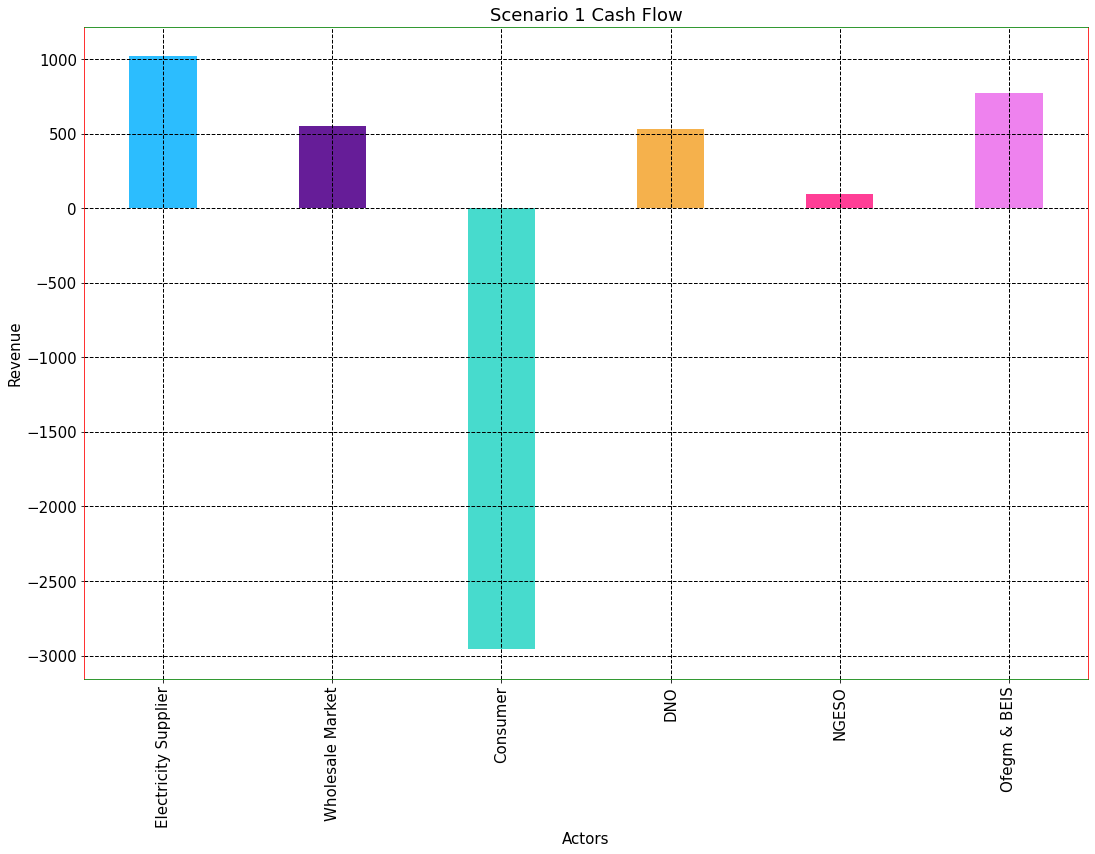

Actor name to be compaed for cash flow?DNO
Scenario you want as base:1


<Figure size 432x288 with 0 Axes>

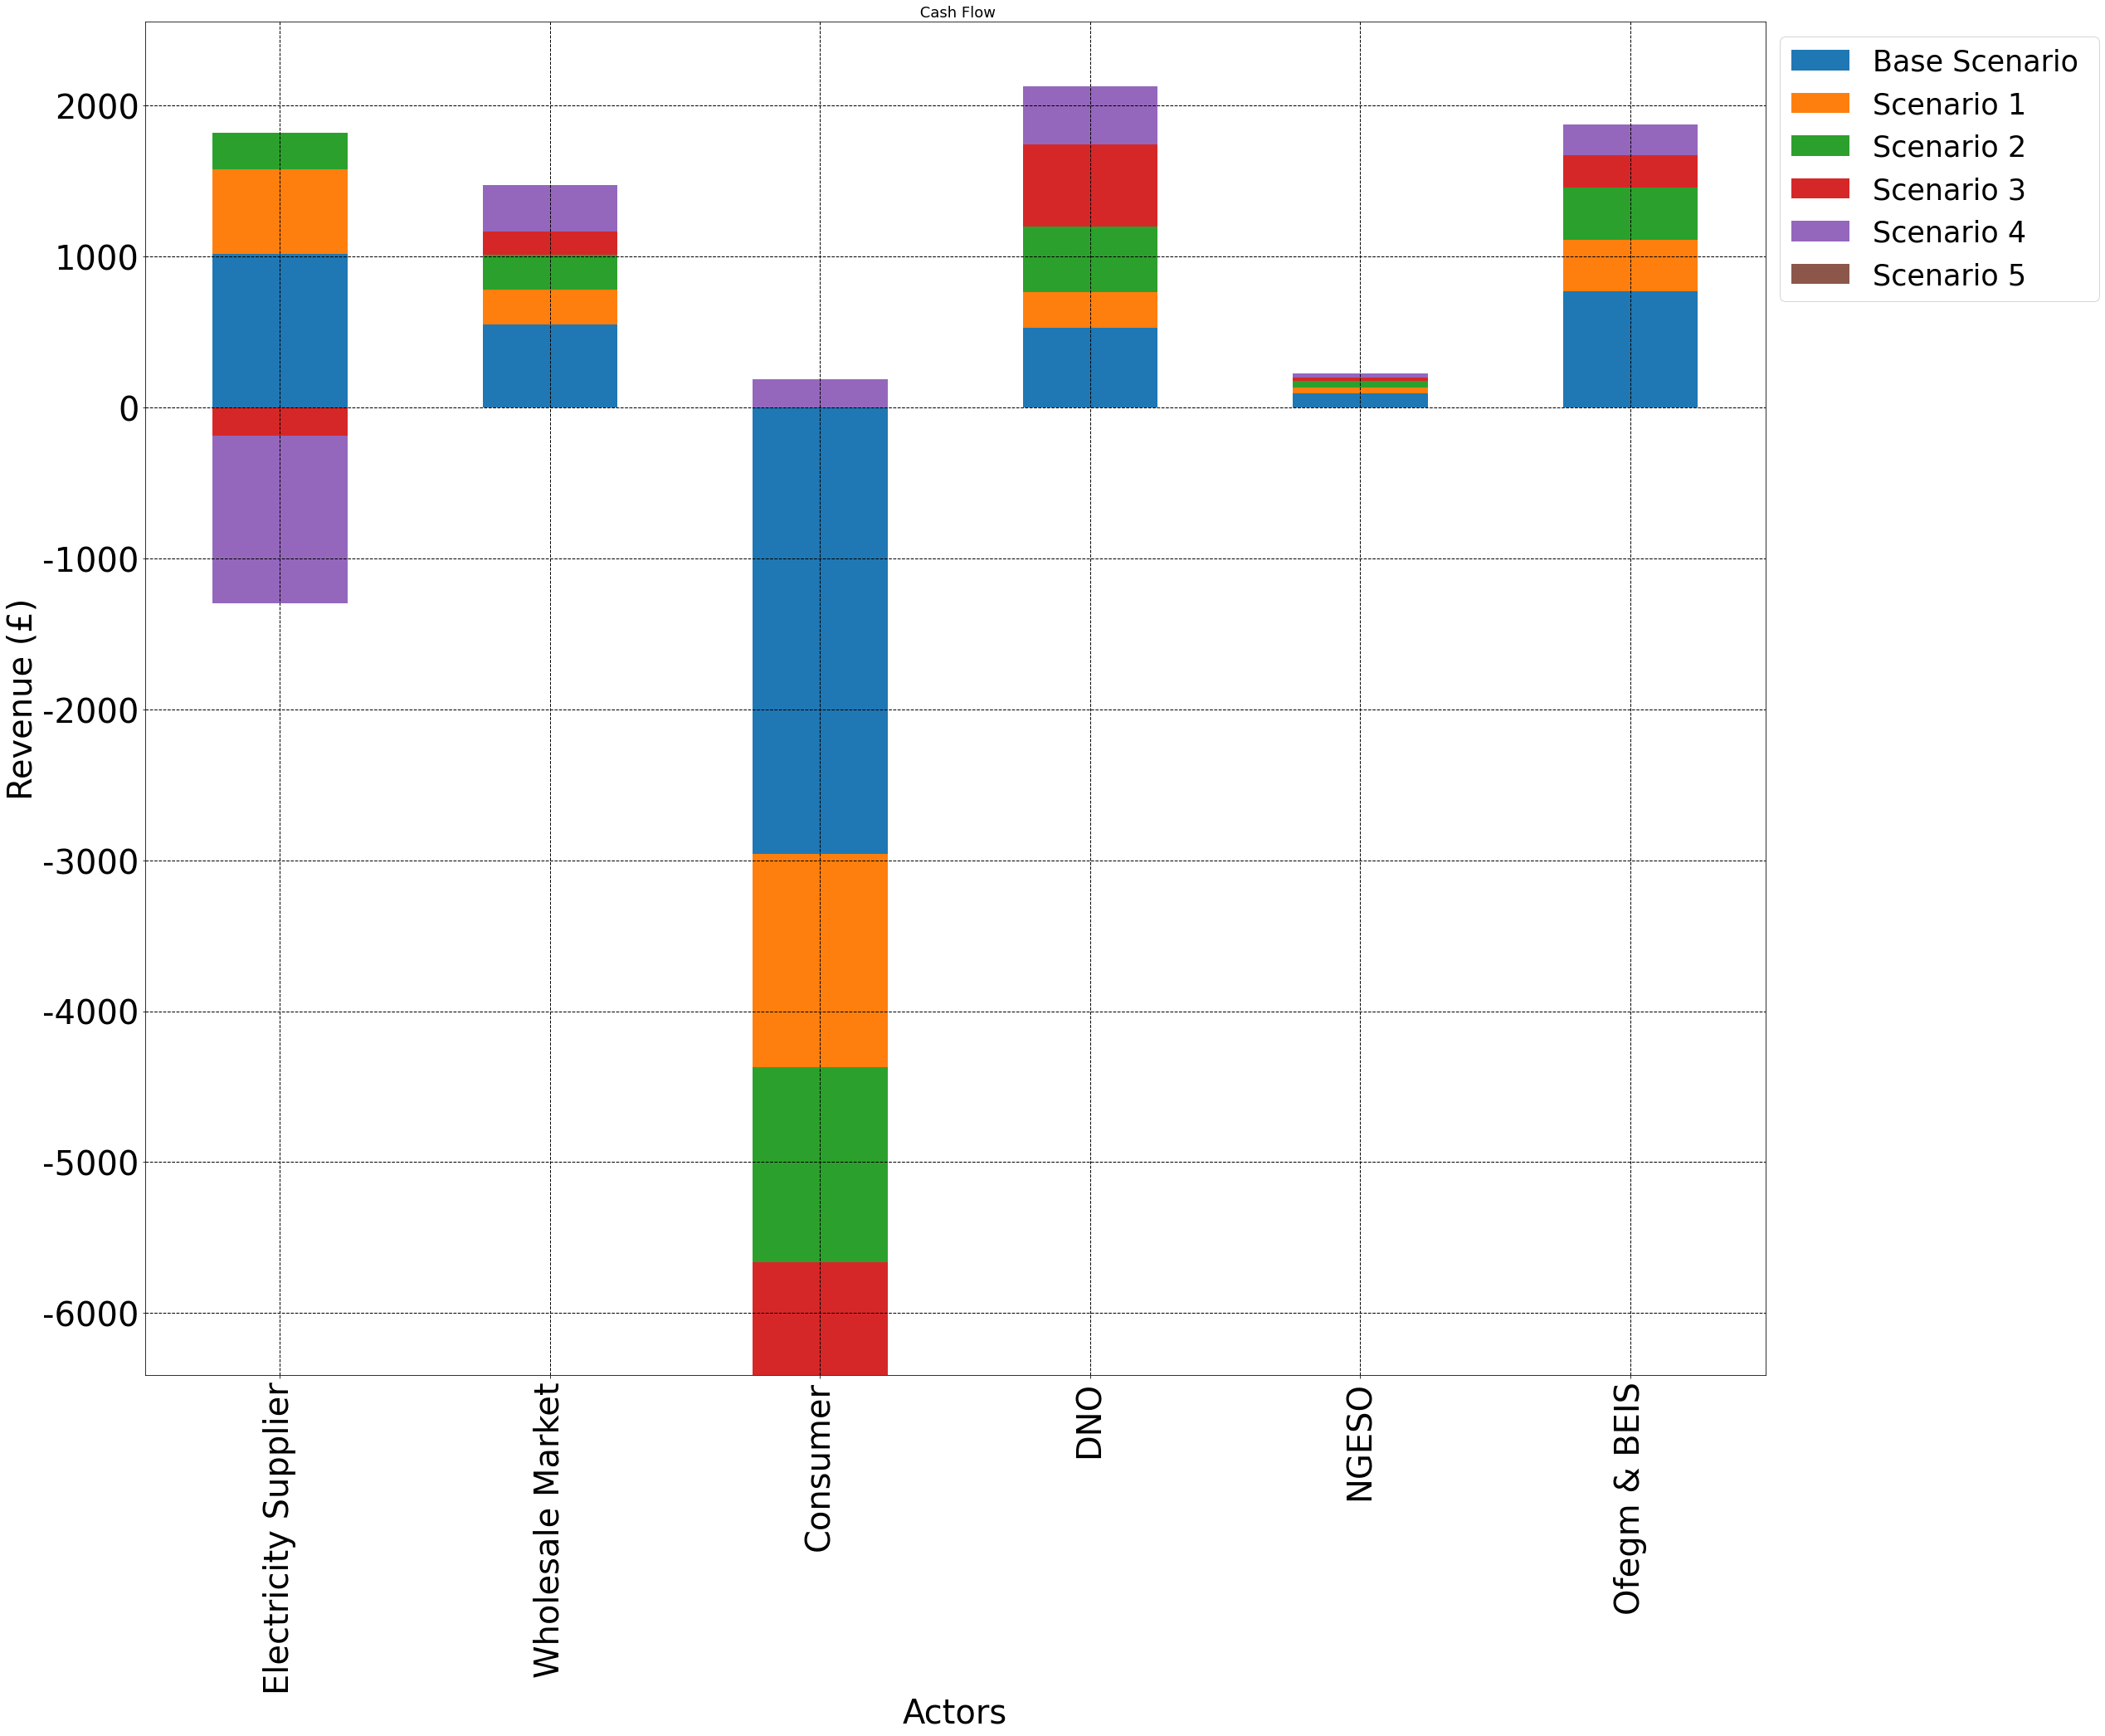

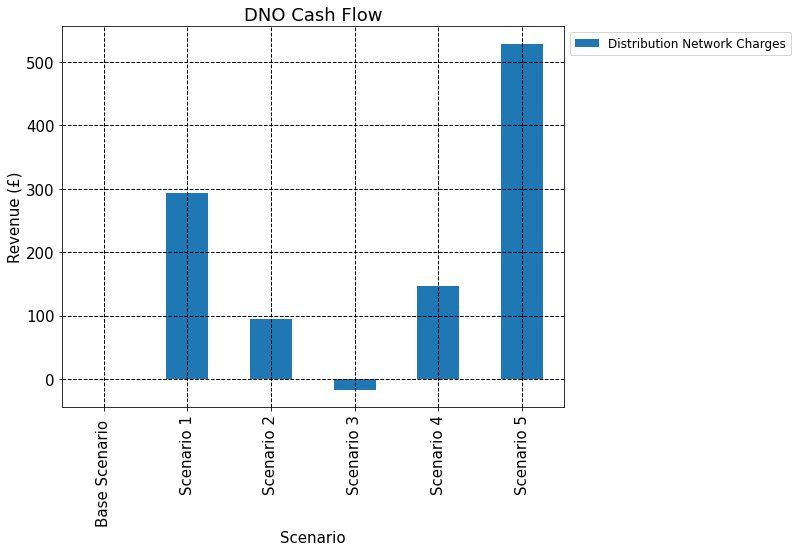

In [14]:
file = input("Enter the file path: ")

run_full_analysis(file)